In [123]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

### Initial data import

In [124]:
'''#Import data
filename = 'Motor_Vehicle_Collisions_-_Crashes_20250415.csv'

df = pd.read_csv(filename)

#Print the header
#print(df.head())

#split up the date into year, month, day
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y')
df['Year'] = df['CRASH DATE'].dt.year

#print(df.head())

# Remove years 2012 and 2025
df = df[(df['Year'] != 2012) & (df['Year'] != 2025)]

#print(df.head())

# Save the merged DataFrame to a CSV file
df.to_csv("sorted_data.csv", index=False)'''

'#Import data\nfilename = \'Motor_Vehicle_Collisions_-_Crashes_20250415.csv\'\n\ndf = pd.read_csv(filename)\n\n#Print the header\n#print(df.head())\n\n#split up the date into year, month, day\ndf[\'CRASH DATE\'] = pd.to_datetime(df[\'CRASH DATE\'], format=\'%m/%d/%Y\')\ndf[\'Year\'] = df[\'CRASH DATE\'].dt.year\n\n#print(df.head())\n\n# Remove years 2012 and 2025\ndf = df[(df[\'Year\'] != 2012) & (df[\'Year\'] != 2025)]\n\n#print(df.head())\n\n# Save the merged DataFrame to a CSV file\ndf.to_csv("sorted_data.csv", index=False)'

### Fundamental distributions

In [125]:
file = 'sorted_data.csv'

data = pd.read_csv(file)

C:\Users\idasa\AppData\Local\Temp\ipykernel_19776\2640694134.py:3: DtypeWarning: Columns (3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)


In [126]:
data['Month'] = pd.to_datetime(data['CRASH DATE']).dt.month
data['Day'] = pd.to_datetime(data['CRASH DATE']).dt.day

In [127]:
file_weather = 'NYC_Central_Park_weather_1869-2022.csv'
weather_data = pd.read_csv(file_weather)
weather_data['DATE'] = pd.to_datetime(weather_data['DATE'], format='%Y-%m-%d')
weather_data['Year'] = weather_data['DATE'].dt.year
weather_data['Month'] = weather_data['DATE'].dt.month
weather_data['Day'] = weather_data['DATE'].dt.day
weather_data = weather_data[(weather_data['Year'] > 2012) & (weather_data['Year'] < 2025)]

In [128]:
#Print size of the data
#print(data.shape)
print(weather_data.shape)

(3650, 9)


In [129]:
print(weather_data)

            DATE  PRCP  SNOW  SNWD  TMIN  TMAX  Year  Month  Day
52595 2013-01-01   0.0   0.0   0.0  26.0  40.0  2013      1    1
52596 2013-01-02   0.0   0.0   0.0  22.0  33.0  2013      1    2
52597 2013-01-03   0.0   0.0   0.0  24.0  32.0  2013      1    3
52598 2013-01-04   0.0   0.0   0.0  30.0  37.0  2013      1    4
52599 2013-01-05   0.0   0.0   0.0  32.0  42.0  2013      1    5
...          ...   ...   ...   ...   ...   ...   ...    ...  ...
56240 2022-12-25   0.0   0.0   0.0  14.0  28.0  2022     12   25
56241 2022-12-26   0.0   0.0   0.0  18.0  29.0  2022     12   26
56242 2022-12-27   0.0   0.0   0.0  29.0  35.0  2022     12   27
56243 2022-12-28   0.0   0.0   0.0  33.0  47.0  2022     12   28
56244 2022-12-29   0.0   0.0   0.0  40.0  51.0  2022     12   29

[3650 rows x 9 columns]


In [130]:
#Merge the weather data with the crash data, and copy the weather data to each of the relevant crash data
data_with_weather = pd.merge(data, weather_data, how='left', left_on=['Year', 'Month', 'Day'], right_on=['Year', 'Month', 'Day'])


In [131]:
#Remove years 2023-2024
data_with_weather = data_with_weather[(data_with_weather['Year'] != 2023) & (data_with_weather['Year'] != 2024)]

In [132]:
print(data_with_weather.shape)
print(data_with_weather)

(582044, 38)
        CRASH DATE CRASH TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0       2021-12-14      14:58  MANHATTAN  10017.0  40.751440 -73.973970   
1       2021-12-14      16:50     QUEENS  11413.0  40.675884 -73.755770   
2       2021-12-14      23:10     QUEENS  11434.0  40.666840 -73.789410   
3       2021-12-14      17:15   BROOKLYN  11211.0  40.710957 -73.951126   
4       2022-09-22      16:16     QUEENS  11418.0  40.698257 -73.826320   
...            ...        ...        ...      ...        ...        ...   
629878  2021-09-03      10:10  MANHATTAN  10024.0  40.787693 -73.981150   
632864  2021-09-21      22:41     QUEENS  11373.0  40.736248 -73.878680   
636079  2021-11-09      13:25     QUEENS  11372.0  40.747135 -73.892410   
640947  2022-12-31       4:34      BRONX  10463.0  40.885098 -73.900660   
640962  2022-06-09      23:40  MANHATTAN  10002.0  40.717724 -73.985770   

                       LOCATION         ON STREET NAME CROSS STREET NAME  \
0         

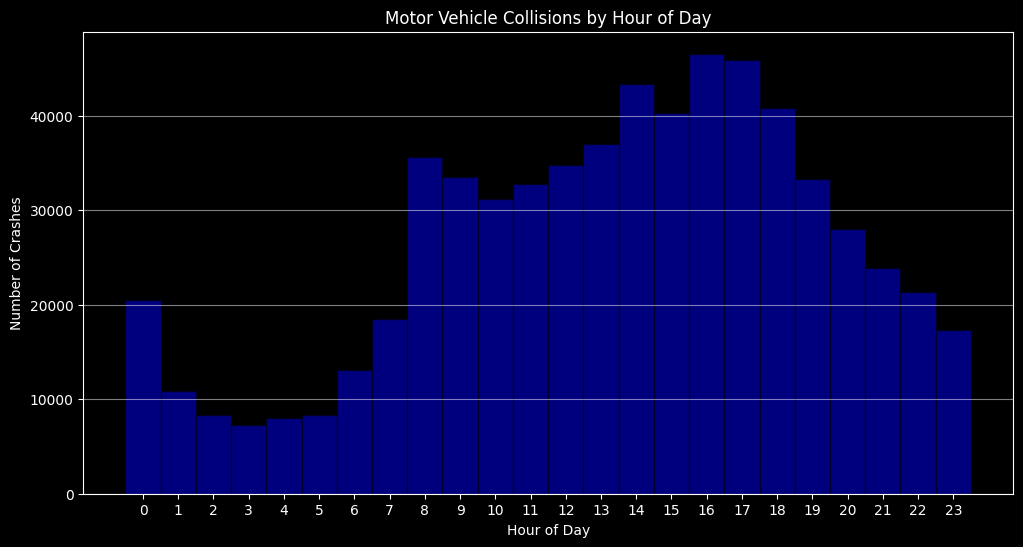

In [133]:
# Sort the time of day into hours only
data['Hour'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M').dt.hour

# Plot the crashes at the time of day
plt.figure(figsize=(12, 6))
plt.hist(data['Hour'], bins=np.arange(0, 25) - 0.5, color='blue', alpha=0.5, edgecolor='black', align='mid')
plt.title('Motor Vehicle Collisions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.xticks(np.arange(0, 24, 1))
plt.grid(axis='y', alpha=0.5)
plt.show()


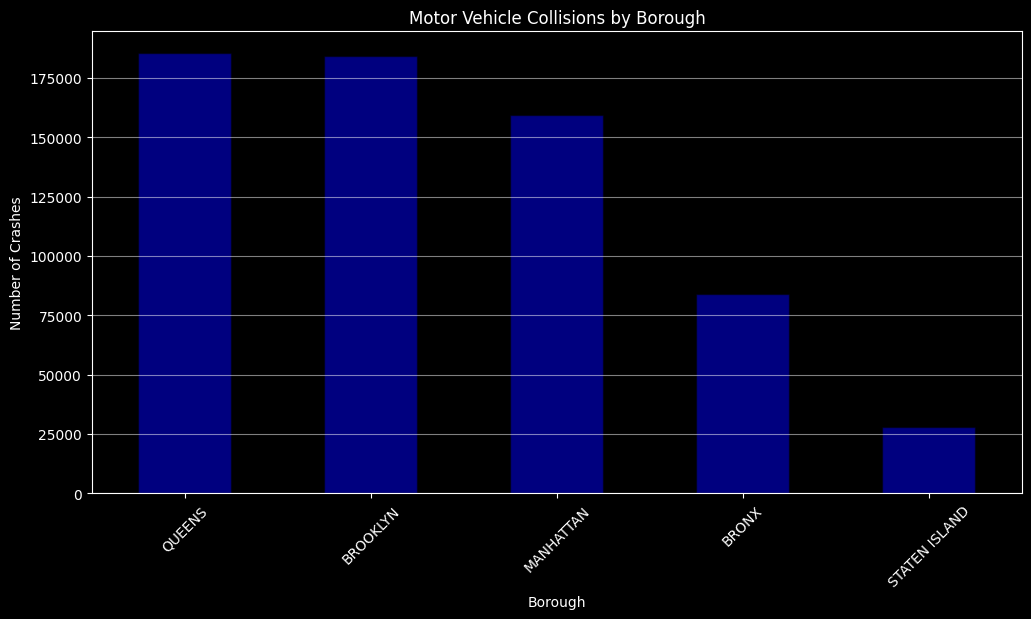

In [134]:
# Plot the crashes by borrough
plt.figure(figsize=(12, 6))
data['BOROUGH'].value_counts().plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Motor Vehicle Collisions by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()


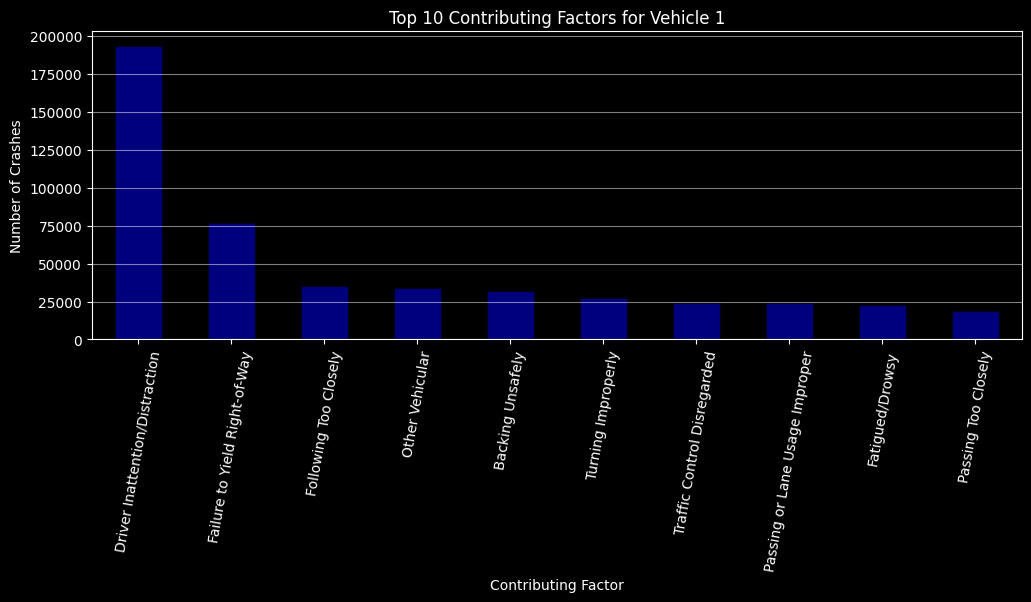

In [135]:
# Plot the crashes by contributing factor
plt.figure(figsize=(12, 4))
data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10).plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Top 10 Contributing Factors for Vehicle 1')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=80)
plt.grid(axis='y', alpha=0.5)
plt.show()


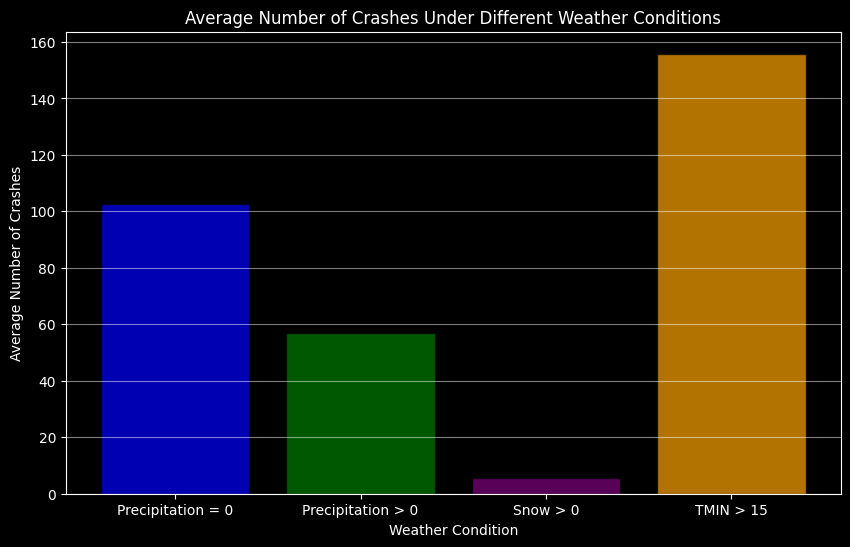

In [136]:
# Plot the average number of crashes under: precipitation=0, precipitation>0, snow>0, and TMIN>15
# Calculate average number of crashes for each condition
avg_crashes_precip_0 = data_with_weather[data_with_weather['PRCP'] == 0].shape[0] / len(data_with_weather['DATE'].unique())
avg_crashes_precip_gt_0 = data_with_weather[data_with_weather['PRCP'] > 0].shape[0] / len(data_with_weather['DATE'].unique())
avg_crashes_snow_gt_0 = data_with_weather[data_with_weather['SNOW'] > 0].shape[0] / len(data_with_weather['DATE'].unique())
avg_crashes_tmin_gt_15 = data_with_weather[data_with_weather['TMIN'] > 15].shape[0] / len(data_with_weather['DATE'].unique())

# Plot the results
conditions = ['Precipitation = 0', 'Precipitation > 0', 'Snow > 0', 'TMIN > 15']
averages = [avg_crashes_precip_0, avg_crashes_precip_gt_0, avg_crashes_snow_gt_0, avg_crashes_tmin_gt_15]

plt.figure(figsize=(10, 6))
plt.bar(conditions, averages, color=['blue', 'green', 'purple', 'orange'], alpha=0.7, edgecolor='black')
plt.title('Average Number of Crashes Under Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Average Number of Crashes')
plt.grid(axis='y', alpha=0.5)
plt.show()




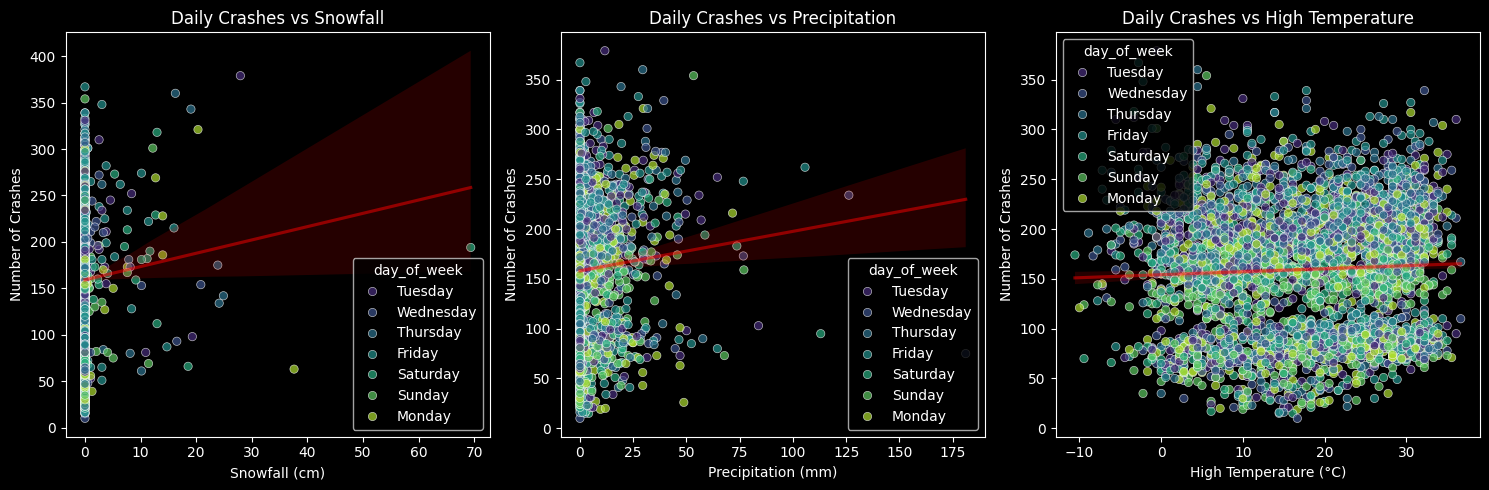

In [137]:
import seaborn as sns

# Step 1: Aggregate the crash data to get daily crash counts
daily_crashes = data_with_weather.groupby('DATE').size().reset_index(name='daily_crash_count')

# Step 2: Merge the aggregated crash data with weather data
daily_data = pd.merge(daily_crashes, weather_data, how='left', left_on='DATE', right_on='DATE')

# Step 3: Convert snowfall and precipitation to cm and mm, and temperature to Celsius
daily_data['snowfall_cm'] = daily_data['SNOW'] * 2.54  # Convert inches to cm
daily_data['precipitation_mm'] = daily_data['PRCP'] * 25.4  # Convert inches to mm
daily_data['high_temperature_c'] = (daily_data['TMAX'] - 32) * 5.0 / 9.0  # Convert Fahrenheit to Celsius

# Step 4: Add a column for the day of the week
daily_data['day_of_week'] = daily_data['DATE'].dt.day_name()

# Step 5: Create scatter plots
plt.figure(figsize=(15, 5))

# a) Scatter plot for snowfall
plt.subplot(1, 3, 1)
sns.scatterplot(data=daily_data, x='snowfall_cm', y='daily_crash_count', hue='day_of_week', palette='viridis', alpha=0.7)
sns.regplot(data=daily_data, x='snowfall_cm', y='daily_crash_count', scatter=False, color='red', line_kws={'alpha': 0.5})
plt.title('Daily Crashes vs Snowfall')
plt.xlabel('Snowfall (cm)')
plt.ylabel('Number of Crashes')

# b) Scatter plot for precipitation
plt.subplot(1, 3, 2)
sns.scatterplot(data=daily_data, x='precipitation_mm', y='daily_crash_count', hue='day_of_week', palette='viridis', alpha=0.7)
sns.regplot(data=daily_data, x='precipitation_mm', y='daily_crash_count', scatter=False, color='red', line_kws={'alpha': 0.5})
plt.title('Daily Crashes vs Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Number of Crashes')

# c) Scatter plot for high temperature
plt.subplot(1, 3, 3)
sns.scatterplot(data=daily_data, x='high_temperature_c', y='daily_crash_count', hue='day_of_week', palette='viridis', alpha=0.7)
sns.regplot(data=daily_data, x='high_temperature_c', y='daily_crash_count', scatter=False, color='red', line_kws={'alpha': 0.5})
plt.title('Daily Crashes vs High Temperature')
plt.xlabel('High Temperature (°C)')
plt.ylabel('Number of Crashes')

plt.tight_layout()
plt.show()


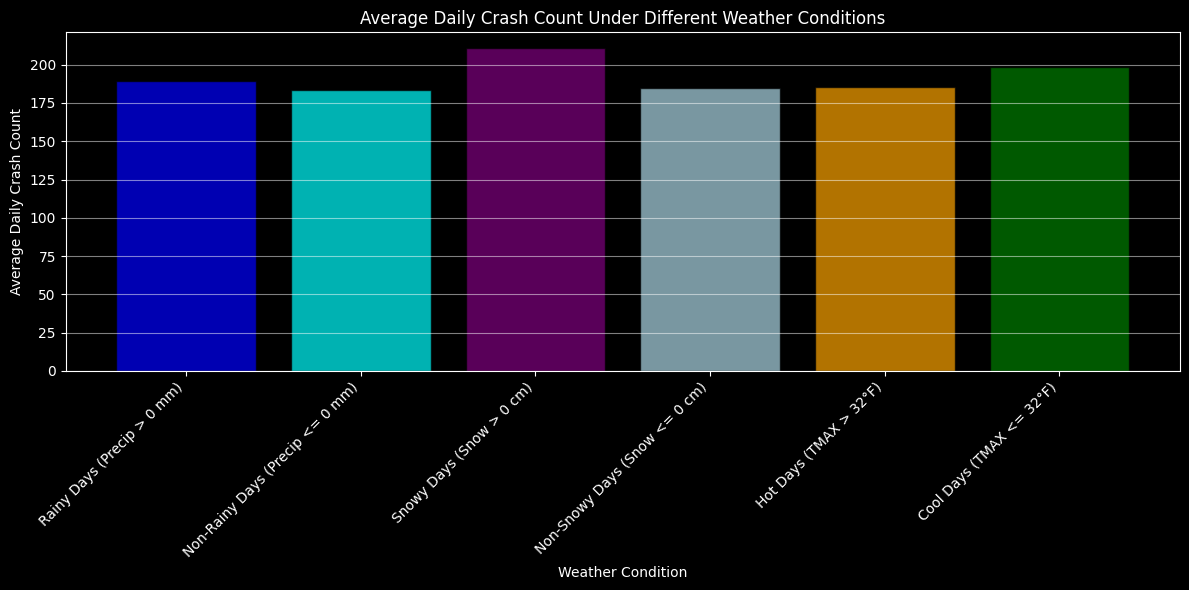

1.0327953667151555
1.1392431617661525
1.0516494520565232


In [138]:
# Step 1: Aggregate the crash data to get daily crash counts
daily_crashes = data_with_weather.groupby('DATE').size().reset_index(name='daily_crash_count')

# Step 2: Merge the aggregated crash data with the original data_with_weather DataFrame
data_with_weather = pd.merge(data_with_weather, daily_crashes, how='left', on='DATE')

tmax_le_32_crash_days = data_with_weather[data_with_weather['TMAX'] <= 32]
tmax_gt_32_crash_days = data_with_weather[data_with_weather['TMAX'] > 32]
precip_le_0_crash_days = data_with_weather[data_with_weather['PRCP'] <= 0]
precip_gt_0_crash_days = data_with_weather[data_with_weather['PRCP'] > 0]
snow_le_0_crash_days = data_with_weather[data_with_weather['SNOW'] <= 0]
snow_gt_0_crash_days = data_with_weather[data_with_weather['SNOW'] > 0]

# Calculate average daily crash counts for each condition
avg_crashes_precip_gt_0 = precip_gt_0_crash_days['daily_crash_count'].mean()
avg_crashes_precip_le_0 = precip_le_0_crash_days['daily_crash_count'].mean()
avg_crashes_snow_gt_0 = snow_gt_0_crash_days['daily_crash_count'].mean()
avg_crashes_snow_le_0 = snow_le_0_crash_days['daily_crash_count'].mean()
avg_crashes_tmax_gt_32 = tmax_gt_32_crash_days['daily_crash_count'].mean()
avg_crashes_tmax_le_32 = tmax_le_32_crash_days['daily_crash_count'].mean()

# Prepare data for visualization
conditions = [
    'Rainy Days (Precip > 0 mm)', 
    'Non-Rainy Days (Precip <= 0 mm)', 
    'Snowy Days (Snow > 0 cm)', 
    'Non-Snowy Days (Snow <= 0 cm)', 
    'Hot Days (TMAX > 32°F)', 
    'Cool Days (TMAX <= 32°F)'
]
averages = [
    avg_crashes_precip_gt_0, 
    avg_crashes_precip_le_0, 
    avg_crashes_snow_gt_0, 
    avg_crashes_snow_le_0, 
    avg_crashes_tmax_gt_30, 
    avg_crashes_tmax_le_30
]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(conditions, averages, color=['blue', 'cyan', 'purple', 'lightblue', 'orange', 'green'], alpha=0.7, edgecolor='black')
plt.title('Average Daily Crash Count Under Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Average Daily Crash Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

print(avg_crashes_precip_gt_0/avg_crashes_precip_le_0)
print(avg_crashes_snow_gt_0/avg_crashes_snow_le_0)
print(avg_crashes_tmax_le_32/avg_crashes_tmax_gt_32)



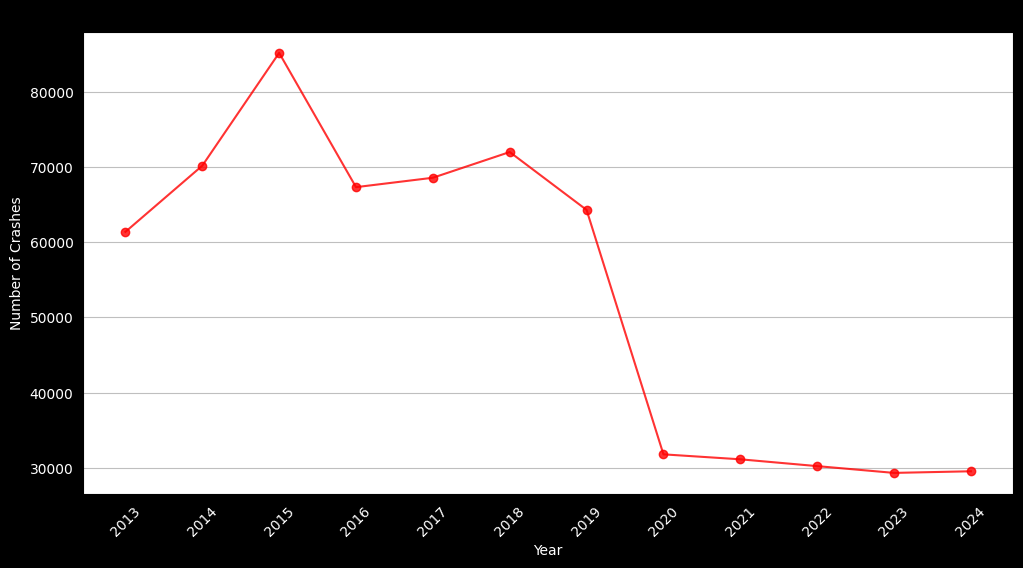

In [142]:
# Plot the trend in crashes over the years
plt.figure(figsize=(12, 6))
plt.style.use('default')  # Set the style to standard
data['Year'].value_counts().sort_index().plot(kind='line', color='red', alpha=0.8, marker='o')
plt.title('Trend in Motor Vehicle Collisions Over the Years')
plt.xlabel('Year', color='white')
plt.ylabel('Number of Crashes', color='white')
plt.xticks(ticks=np.arange(data['Year'].min(), data['Year'].max() + 1, 1), rotation=45, color='white')
plt.yticks(color='white')
plt.grid(axis='y', alpha=0.5, color='gray')
plt.show()


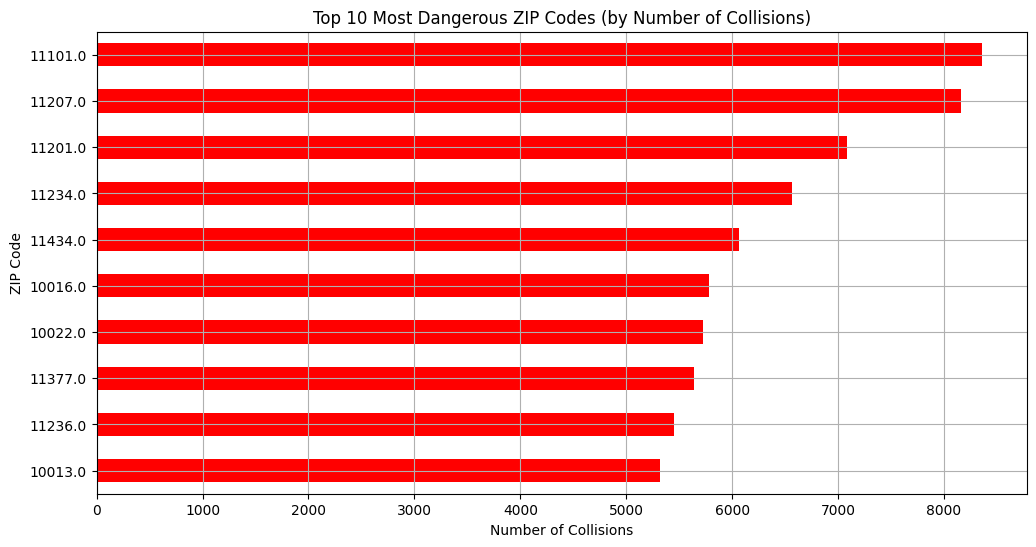

In [143]:
# Group by ZIP and count collisions
zip_counts = data['ZIP CODE'].value_counts().head(10)

# Plot
plt.figure(figsize=(12,6))
zip_counts.plot(kind='barh', color='red')
plt.title('Top 10 Most Dangerous ZIP Codes (by Number of Collisions)')
plt.xlabel('Number of Collisions')
plt.ylabel('ZIP Code')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

In [ ]:
'''
# Drop missing coordinates
coords = data[['LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].dropna()

# Create base map centered in NYC
map_center = [coords['LATITUDE'].mean(), coords['LONGITUDE'].mean()]
m = folium.Map(location=map_center, zoom_start=11)

# Add marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Function to pick marker color
def choose_color(row):
    if row['NUMBER OF PERSONS KILLED'] > 0:
        return 'red'
    elif row['NUMBER OF PERSONS INJURED'] > 0:
        return 'orange'
    else:
        return 'blue'

# Add markers
for idx, row in coords.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        icon=folium.Icon(color=choose_color(row)),
        popup=(f"Injuries: {row['NUMBER OF PERSONS INJURED']}<br>"
               f"Fatalities: {row['NUMBER OF PERSONS KILLED']}")
    ).add_to(marker_cluster)

# Save or display
m.save('collision_clusters.html')
m'''

KeyboardInterrupt: 

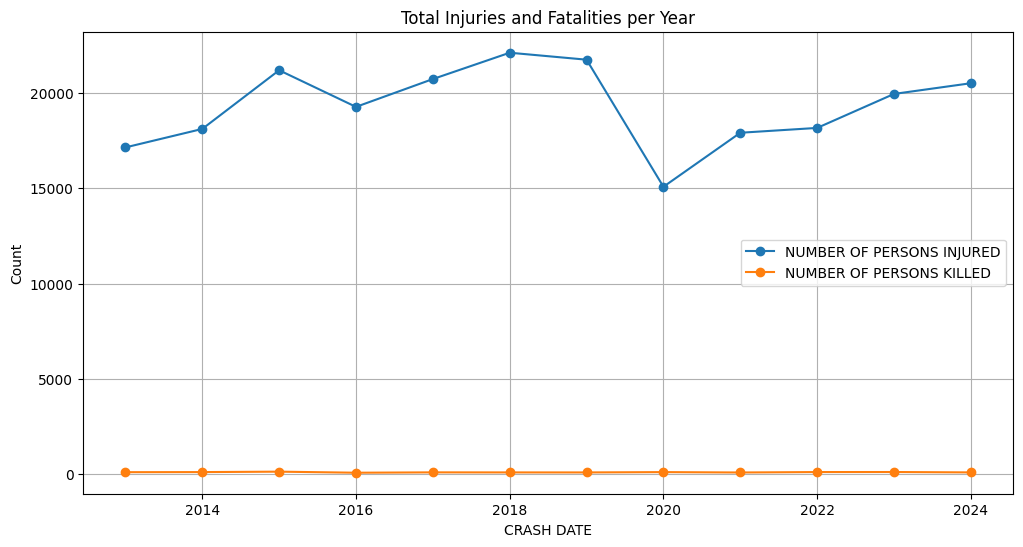

In [147]:
# Ensure crash date is datetime
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# Group by year
yearly = data.groupby(data['CRASH DATE'].dt.year)[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].sum()

# Plot
yearly.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Total Injuries and Fatalities per Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

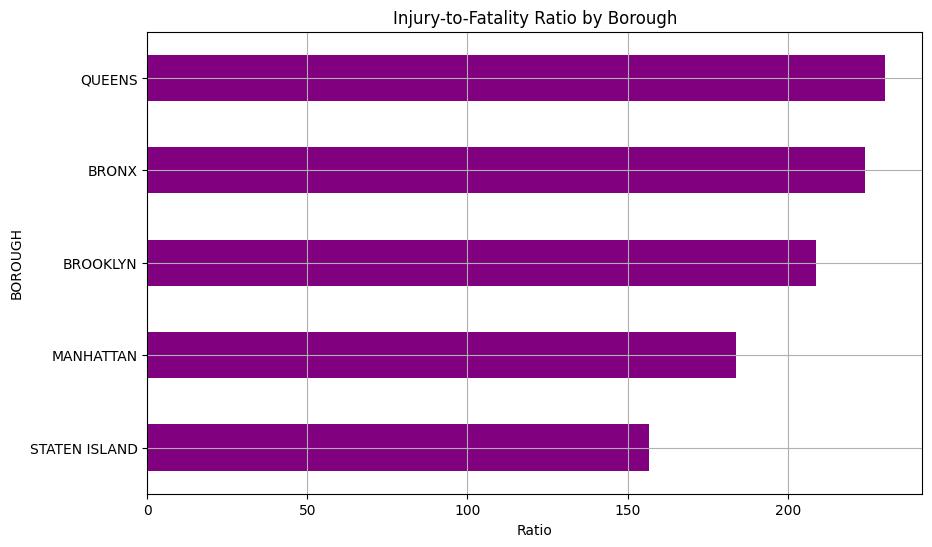

In [148]:
# Group by borough
borough = data.groupby('BOROUGH')[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].sum()

# Calculate ratio
borough['Injury-to-Fatality Ratio'] = borough['NUMBER OF PERSONS INJURED'] / (borough['NUMBER OF PERSONS KILLED'] + 1) # +1 to avoid division by zero

# Plot
borough['Injury-to-Fatality Ratio'].sort_values().plot(kind='barh', figsize=(10,6), color='purple')
plt.title('Injury-to-Fatality Ratio by Borough')
plt.xlabel('Ratio')
plt.grid(True)
plt.show()


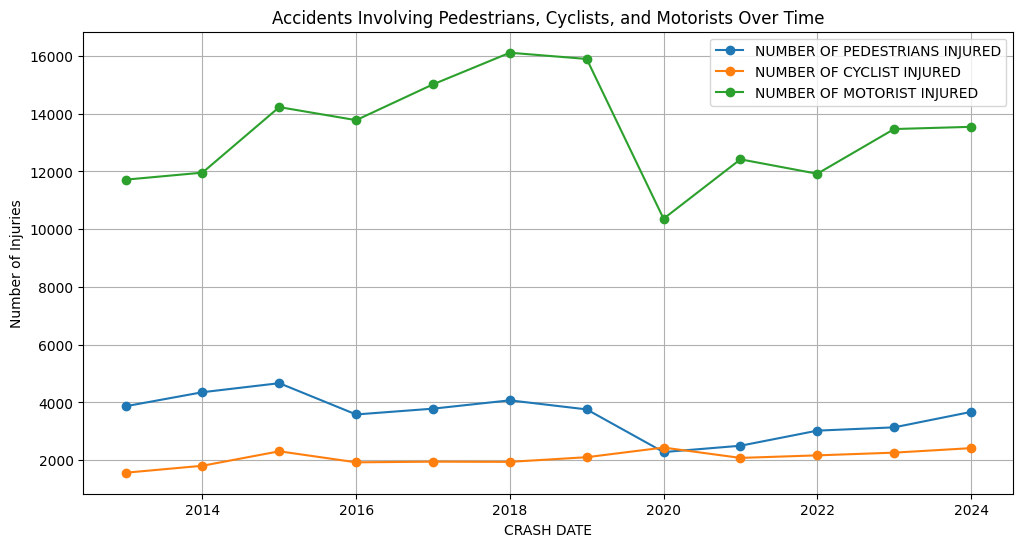

In [149]:
# Group by year
ped_cyc_mot = data.groupby(data['CRASH DATE'].dt.year)[[
    'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF CYCLIST INJURED',
    'NUMBER OF MOTORIST INJURED'
]].sum()

# Plot
ped_cyc_mot.plot(figsize=(12,6), marker='o')
plt.title('Accidents Involving Pedestrians, Cyclists, and Motorists Over Time')
plt.ylabel('Number of Injuries')
plt.grid(True)
plt.show()

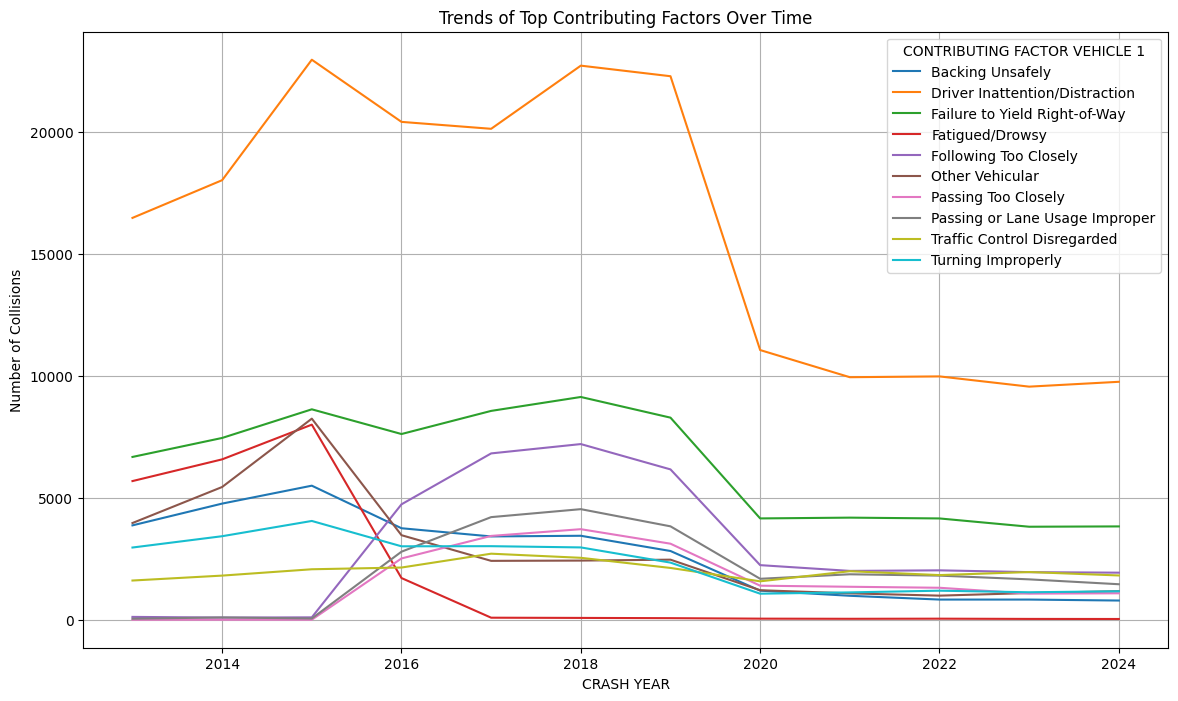

In [151]:
# Filter relevant contributing factors (Vehicle 1 is enough for start)
data['CRASH YEAR'] = data['CRASH DATE'].dt.year

top_factors = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10).index

# Filter to only top contributing factors
factor_df = data[data['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_factors)]

# Group by Year and Contributing Factor
factor_trends = factor_df.groupby(['CRASH YEAR', 'CONTRIBUTING FACTOR VEHICLE 1']).size().unstack().fillna(0)

# Plot
factor_trends.plot(figsize=(14,8))
plt.title('Trends of Top Contributing Factors Over Time')
plt.ylabel('Number of Collisions')
plt.grid(True)
plt.show()

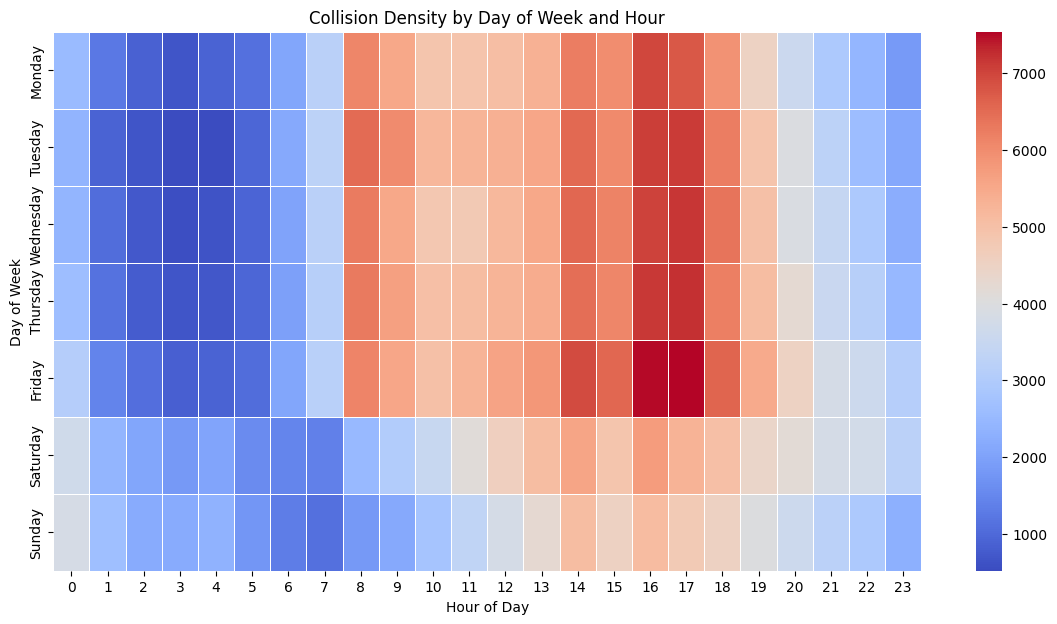

In [152]:
# Extract day of week and hour
data['DayOfWeek'] = data['CRASH DATE'].dt.day_name()
data['Hour'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M').dt.hour

# Pivot table
heatmap_data = data.pivot_table(index='DayOfWeek', columns='Hour', values='COLLISION_ID', aggfunc='count').fillna(0)

# Sort days properly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# Plot
plt.figure(figsize=(14,7))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5)
plt.title('Collision Density by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

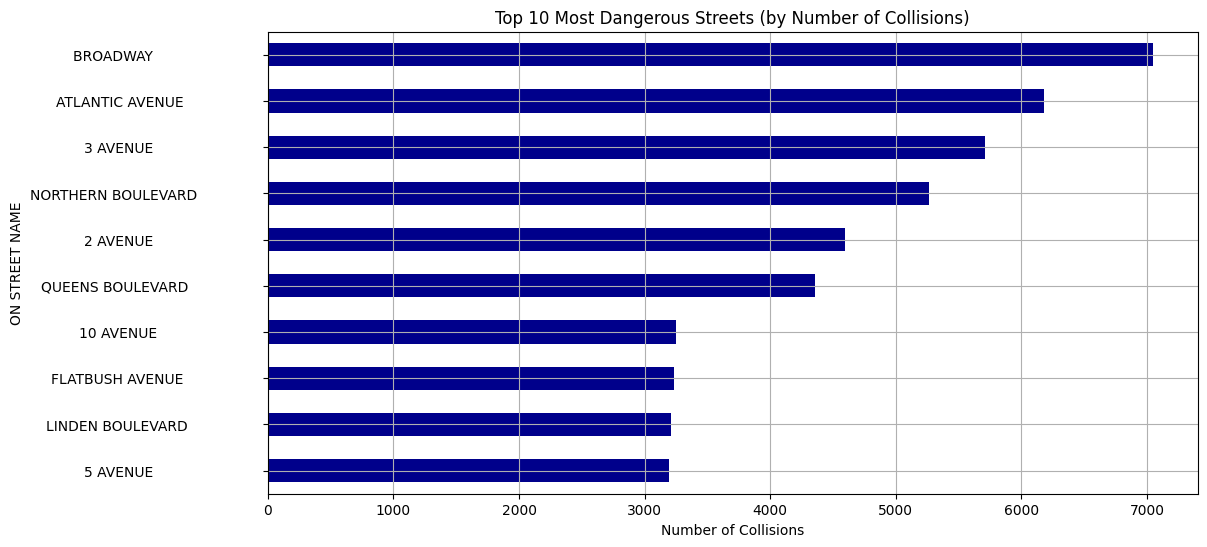

In [153]:
# We'll use 'ON STREET NAME' column
top_streets = data['ON STREET NAME'].value_counts().head(10)

# Plot
top_streets.plot(kind='barh', figsize=(12,6), color='darkblue')
plt.title('Top 10 Most Dangerous Streets (by Number of Collisions)')
plt.xlabel('Number of Collisions')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()